# 🎧 Spotify Songs Analysis Project

In this project we perform an Exploratory Data Analysis (EDA) on a dataset of 114,000 Spotify tracks sourced from Kaggle.

💡 Key columns in this dataset include:

* track_id: The unique Spotify ID for each track.
* artists: Names of the artists who performed the track, separated by ';'.
* album_name: The name of the album in which the track appears.
* track_name: The title of the track.
* popularity: A value between 0 and 100, indicating the track's popularity based on recent plays.
* explicit: Boolean indicating whether the track contains explicit content.
* danceability: Describes how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable).
* energy: Represents the intensity and activity of a track (0.0 = low energy, 1.0 = high energy).
* loudness: Overall loudness of the track in decibels (dB).
* valence: Measures the musical positiveness conveyed by a track (0.0 = negative, 1.0 = positive).
* tempo: Estimated tempo of the track in beats per minute (BPM).

## 📁 Importing libraries & inspecting the dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/Users/vasiagalanopoulou/Desktop/spotify-project/dataset/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [12]:
df.shape

(114000, 21)

In [13]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


We now check for missing values and dublicated rows

In [14]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [15]:
df.duplicated().sum()

0

## 🧹Cleaning the Dataset

In [16]:
df.dropna(inplace=True)
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [17]:
df.drop_duplicates(inplace=True)
df.shape

(113999, 21)

It is important to separate the artists that share a song into multiple rows so we won't be grouping artists in collaborations as if they're a single entity.

In [18]:
df['artists'] = df['artists'].str.split(';')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,[Gen Hoshino],Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,[Ben Woodward],Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,"[Ingrid Michaelson, ZAYN]",To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,[Kina Grannis],Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,[Chord Overstreet],Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,[Rainy Lullaby],#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,[Rainy Lullaby],#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,[Cesária Evora],Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,[Michael W. Smith],Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [19]:
df_exploded = df.explode('artists')
df_exploded

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [20]:
df_exploded.nunique()

Unnamed: 0          113999
track_id             89740
artists              29859
album_name           46589
track_name           73608
popularity             101
duration_ms          50696
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45652
time_signature           5
track_genre            114
dtype: int64

The data is cleaned up and ready — let’s dive into the analysis!

## 📈 Which genres are the most popular on average?

We begin with exploring which genres are the most popular on average. By grouping the data by genre and calculating the mean popularity score for each, we can identify which styles tend to perform better overall on Spotify. The chart below shows the top 10 genres with the highest average popularity. This doesn't necessarily mean they're the most frequent, but rather that songs within these genres tend to score well in terms of listener engagement.

In [21]:
avg_popularity = df_exploded.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)
avg_popularity

track_genre
pop-film     59.853377
k-pop        55.014548
chill        53.144224
sad          52.076765
indian       49.844314
grunge       49.647172
pop          48.716239
emo          48.646782
anime        48.400673
sertanejo    47.819686
Name: popularity, dtype: float64

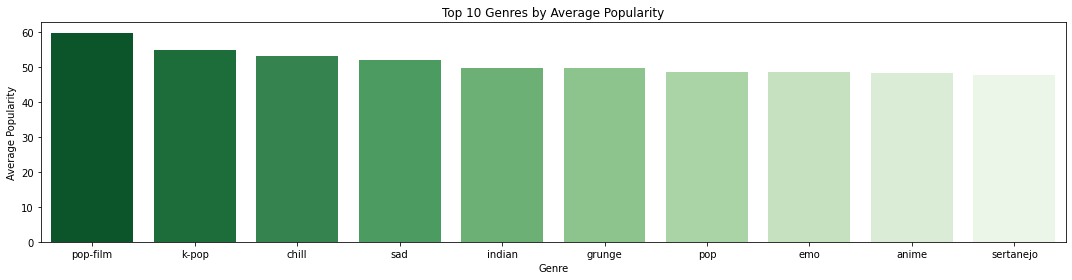

In [22]:
plt.figure(figsize=(15,4))

sns.barplot(x=avg_popularity.index, y=avg_popularity.values, palette='Greens_r', hue=avg_popularity.index, legend=False)
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.tight_layout()

plt.show()

In contrast to the most popular genres, we also examine the genres with the lowest average popularity. These may represent, experimental sounds, or genres with smaller audiences. The bar chart below highlights the bottom 10 genres in terms of average popularity. It's important to note that low popularity doesn't necessarily imply low quality — it may simply reflect more specialized listener bases or limited exposure on the platform.

In [23]:
least_popular = df_exploded.groupby('track_genre')['popularity'].mean().sort_values().head(10)
least_popular

track_genre
iranian            2.240126
romance            3.074074
latin              7.979212
classical         10.167137
detroit-techno    11.576297
chicago-house     12.554517
kids              14.545982
grindcore         14.626243
jazz              15.919075
idm               15.998262
Name: popularity, dtype: float64

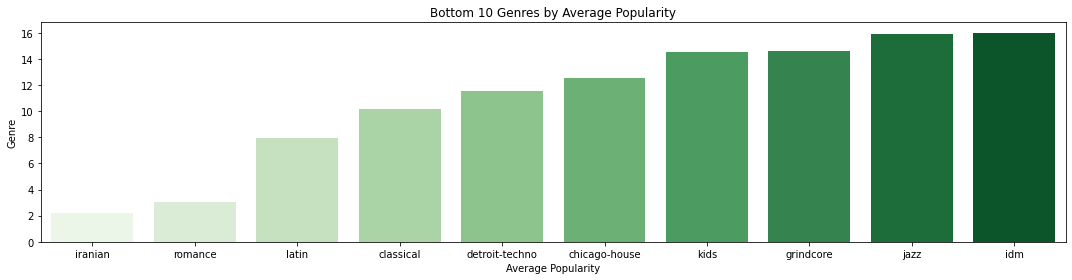

In [24]:
plt.figure(figsize=(15,4))

sns.barplot(x=least_popular.index, y=least_popular.values, palette='Greens', hue=least_popular.index, legend=False)
plt.title('Bottom 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.tight_layout()

plt.show()

## 🔊 Audio Features of the most popular genres

In [25]:
top_populars = df_exploded.groupby('track_genre')[['popularity', 'energy', 'danceability', 'valence']].mean().reset_index()
top_populars = top_populars.sort_values(by='popularity', ascending=False).head(10)
top_populars

,track_genre,popularity,energy,danceability,valence
81,pop-film,59.853377,0.618597,0.606480,0.536005
65,k-pop,55.014548,0.669500,0.650006,0.569967
15,chill,53.144224,0.425643,0.663127,0.400555
94,sad,52.076765,0.454377,0.690191,0.412089
55,indian,49.844314,0.613867,0.599586,0.484020
44,grunge,49.647172,0.803487,0.460218,0.399555
80,pop,48.716239,0.626126,0.641300,0.524567
33,emo,48.646782,0.662830,0.611632,0.439027
5,anime,48.400673,0.684655,0.560704,0.448547
97,sertanejo,47.819686,0.719702,0.594527,0.626523


In [26]:
melted = top_populars.melt(id_vars='track_genre', value_vars=['energy', 'danceability', 'valence'],
                           var_name='Feature', value_name='Value')
melted

,track_genre,Feature,Value
0,pop-film,energy,0.618597
1,k-pop,energy,0.669500
2,chill,energy,0.425643
3,sad,energy,0.454377
4,indian,energy,0.613867
5,grunge,energy,0.803487
6,pop,energy,0.626126
7,emo,energy,0.662830
8,anime,energy,0.684655
9,sertanejo,energy,0.719702


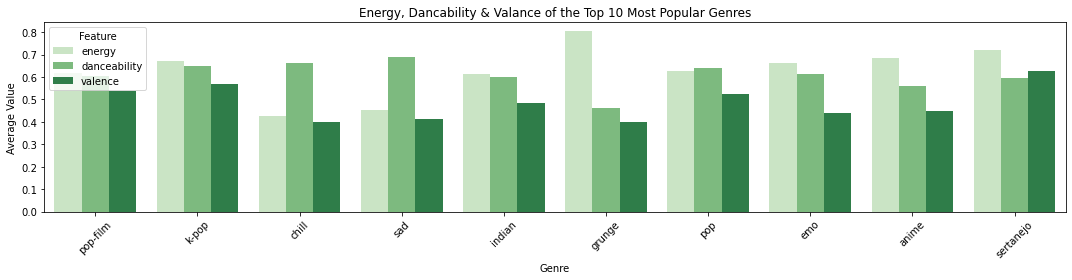

In [27]:
plt.figure(figsize=(15, 4))
sns.barplot(data=melted, x='track_genre', y='Value', hue='Feature', palette='Greens')

plt.title('Energy, Dancability & Valance of the Top 10 Most Popular Genres')
plt.ylabel('Average Value')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

This grouped bar plot shows the average values of three key audio features — energy, danceability, and valence — across the top 10 most popular genres in the dataset. This comparison provides insight into why certain genres may be more popular — not just how popular they are, but how they "feel" to listeners.

## 🎤 Which artists tend to produce the most popular songs?

In [28]:
popular_artists = df_exploded.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
popular_artists

artists
Quevedo             99.0
Bizarrap            99.0
Harry Styles        92.0
Luar La L           90.5
Beach Weather       90.0
Pablo Pesadilla     88.0
Polimá Westcoast    88.0
Olivia Rodrigo      87.4
Lewis Capaldi       87.0
Yung Gravy          87.0
Name: popularity, dtype: float64

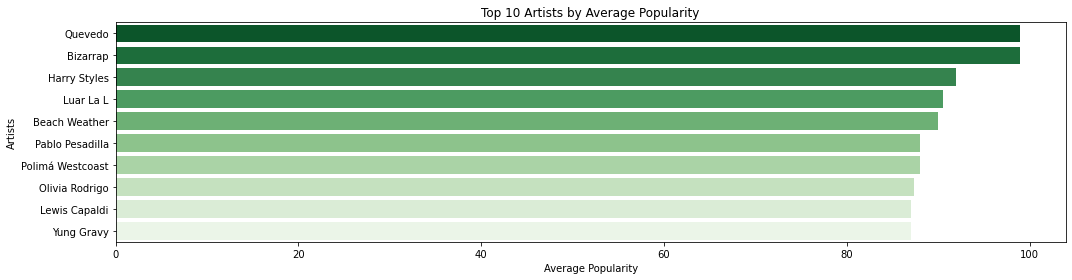

In [29]:
plt.figure(figsize=(15, 4))
sns.barplot(x=popular_artists.values, y=popular_artists.index, palette='Greens_r', hue=popular_artists.index, legend=False)
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artists')
plt.tight_layout()
plt.show()

## 🔞 How many songs contain explicit content overall & by genre?

We will make a pie chart to see what percentage of all tracks have explicit content.

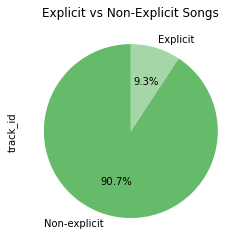

In [30]:
df_exploded.groupby(['explicit'])['track_id'].count().plot.pie(
    labels=['Non-explicit', 'Explicit'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66bb6a', '#a5d6a7'],
    title='Explicit vs Non-Explicit Songs'
)

plt.show()

Next, we will expand our analysis to finding the percentage of explicit content per genre.

In [31]:
genre_explicit_counts = df_exploded.groupby(['track_genre', 'explicit'])['track_id'].count().unstack(fill_value=0)
genre_explicit_counts.columns = ['Non-Explicit', 'Explicit'] 

genre_explicit_percent = genre_explicit_counts.div(genre_explicit_counts.sum(axis=1), axis=0) * 100
genre_explicit_percent = genre_explicit_percent.sort_values(by='Explicit', ascending=False).head(20)
genre_explicit_percent

,Non-Explicit,Explicit
track_genre,,
comedy,36.422614,63.577386
emo,48.508634,51.491366
sad,56.751199,43.248801
j-dance,59.299781,40.700219
hardcore,60.138249,39.861751
funk,60.233029,39.766971
dancehall,68.978562,31.021438
metalcore,69.814815,30.185185
hip-hop,70.425915,29.574085


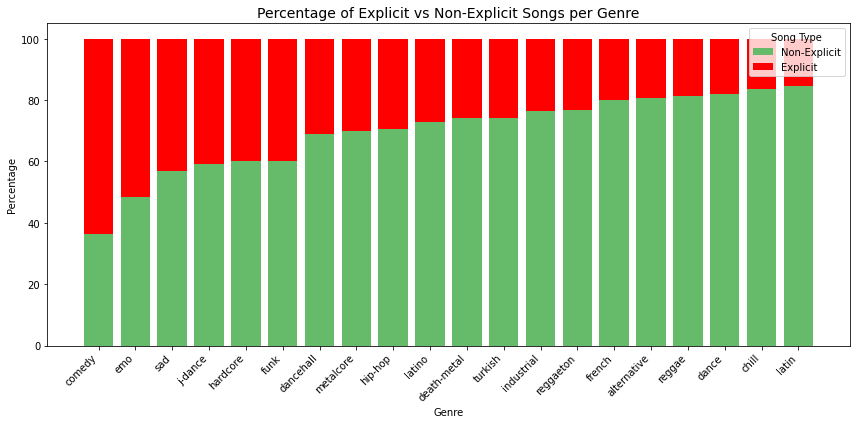

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Non-Explicit (bottom)
ax.bar(genre_explicit_percent.index, genre_explicit_percent['Non-Explicit'],
       label='Non-Explicit', color='#66bb6a')

# Plot Explicit (top)
ax.bar(genre_explicit_percent.index, genre_explicit_percent['Explicit'],
       bottom=genre_explicit_percent['Non-Explicit'], label='Explicit', color='red')

# Customizing
ax.set_title('Percentage of Explicit vs Non-Explicit Songs per Genre', fontsize=14)
ax.set_ylabel('Percentage')
ax.set_xlabel('Genre')
plt.xticks(rotation=45, ha='right')
ax.legend(title='Song Type')
plt.tight_layout()
plt.show()

This 100% stacked bar chart illustrates the proportion of explicit and non-explicit songs within each genre. By normalizing the values, we can compare genres regardless of how many songs they contain. Genres are sorted by the percentage of explicit songs.

## ⚡️ Do higher energy songs tend to be more loud?

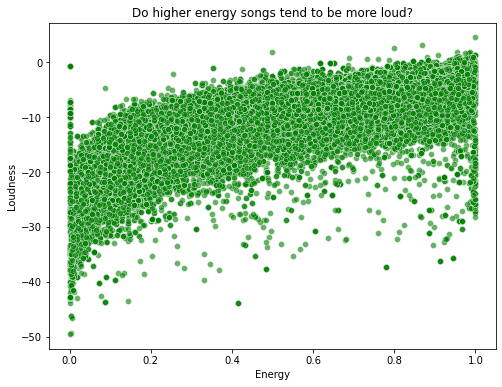

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_exploded, x="energy", y="loudness", alpha=0.6, color='green')
plt.title("Do higher energy songs tend to be more loud?")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

In [34]:
correlation = df_exploded['energy'].corr(df_exploded['loudness'])
print(f"Correlation between energy and loudness: {correlation:.2f}")

Correlation between energy and loudness: 0.78


As we can see, energy and loudness have a strong correlation coefficient of almost 0.8. That means that indeed higher energy tracks tend to be louder.

## 🥁 Do faster songs (higher BPM) tend to be more popular?

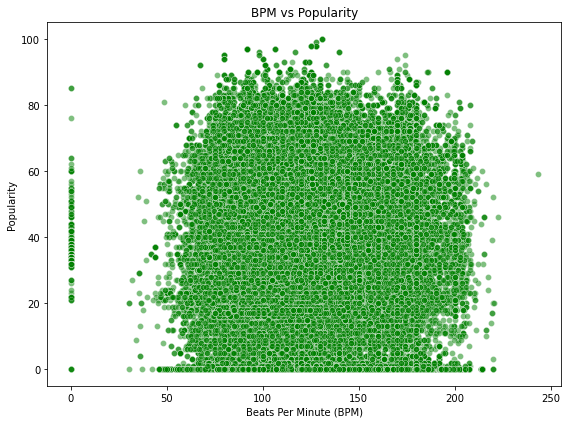

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_exploded, x='tempo', y='popularity', alpha=0.5, color='green')
plt.title('BPM vs Popularity')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

In [36]:
correlation = df_exploded['tempo'].corr(df_exploded['popularity'])
print(f"Correlation between BPM and Popularity: {correlation:.2f}")

Correlation between BPM and Popularity: 0.02


This scatterplot shows the relationship between tempo and song popularity. The correlation coefficient is 0.02, indicating that correlation does not exist between these two metrics.